In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28, 1)

Terdapat 60000 gambar dengan ukuran 28x28

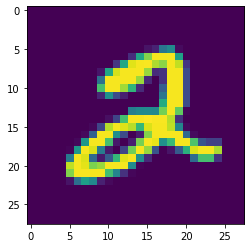

In [ ]:
plt.imshow(x_train[5, :, :, 0])

In [ ]:
#X_train = x_train.reshape(-1, 784)
#X_test = x_test.reshape(-1, 784)

In [ ]:
x_train[5, :,:,0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Keras Model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size = 5, input_shape = (28, 28, 1) ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = 3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = 1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
])



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 22, 22, 64)        0

Terdapat 25120 layer pada Dense, sedangkan di output terdapat 330 layer

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(    
    ),
    metrics = 'accuracy'
)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
with tf.device('/device:GPU:0'):
    model.fit(
        x_train, y_train,
        epochs = 10,
        batch_size = 1000,
        verbose=1
    )

Epoch 1/10
60/60 [==============================] - 263s 4s/step - loss: 11.0326 - accuracy: 0.7004
Epoch 2/10
60/60 [==============================] - 262s 4s/step - loss: 0.2480 - accuracy: 0.9273
Epoch 3/10
60/60 [==============================] - 262s 4s/step - loss: 0.1805 - accuracy: 0.9469
Epoch 4/10
60/60 [==============================] - 262s 4s/step - loss: 0.1469 - accuracy: 0.9563
Epoch 5/10
60/60 [==============================] - 263s 4s/step - loss: 0.1297 - accuracy: 0.9623
Epoch 6/10
60/60 [==============================] - 263s 4s/step - loss: 0.1152 - accuracy: 0.9664
Epoch 7/10
60/60 [==============================] - 261s 4s/step - loss: 0.1040 - accuracy: 0.9694
Epoch 8/10
60/60 [==============================] - 262s 4s/step - loss: 0.0965 - accuracy: 0.9715
Epoch 9/10
60/60 [==============================] - 261s 4s/step - loss: 0.0885 - accuracy: 0.9743
Epoch 10/10
60/60 [==============================] - 259s 4s/step - loss: 0.0840 - accuracy: 0.9752
